In [1]:
from modules.detector import Detector
import sys
sys.path.append("..")
from utils.models import get_base_model
from keras.applications.resnet50 import ResNet50, preprocess_input as resnet50_preprocess_input
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator, save_img
from PIL import Image
from constants import img_size
import numpy as np
from matplotlib import pyplot as plt
import os

Using TensorFlow backend.


In [3]:
detector = Detector('yolo')

input_filepath = '../input/car_data/AM Hummer SUV 2000/00707.jpg'
    
car_image = detector.crop_image(
    source_image=input_filepath,
    input_type='file',
    params={
        'detect_largest_box': True,
        'smallest_detected_area': 0.2,
    }
)

save_img('../input/datasets/test_dataset/AM Hummer SUV 2000/cropped_img.jpg', car_image)

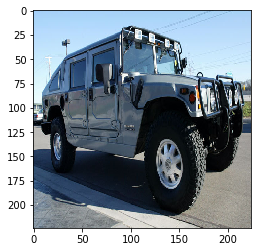

In [4]:
plt.imshow(car_image.resize((img_size, img_size), Image.NEAREST))

In [5]:
base_model = None

datagen = ImageDataGenerator(preprocessing_function=resnet50_preprocess_input)
generator = datagen.flow_from_directory(
    '../input/datasets/test_dataset/',
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=0,
)

#x = img_to_array(input_image.resize((img_size, img_size), Image.NEAREST))
#x = resnet50_preprocess_input(x)
#x = np.expand_dims(x, axis=0)

base_model = get_base_model(ResNet50, img_size=img_size, pooling='avg', verbose=False)

features = base_model.predict_generator(generator, len(generator))

Found 2 images belonging to 1 classes.


In [6]:
features

array([[ 0.38479412,  0.3835049 ,  0.58104563, ...,  0.09123328,
         0.07030845,  0.13601132],
       [ 0.38479412,  0.3835049 ,  0.58104563, ...,  0.09123328,
         0.07030845,  0.13601132]], dtype=float32)

## Saved features

In [4]:
f = np.load('../input/features/xception/features_dev.npy')
print(np.where(f == 0.38479412))
f

(array([], dtype=int64), array([], dtype=int64))


array([[ 0.        ,  0.28606224,  0.41216809, ...,  0.0032816 ,
         0.28517053,  0.08973624],
       [ 0.        ,  0.        ,  0.23129293, ...,  0.56995714,
         0.        ,  0.06757221],
       [ 0.15485659,  0.40815434,  0.19015695, ...,  0.11622358,
         0.00834362,  0.39208764],
       ..., 
       [ 0.07053684,  0.24942943,  0.49056762, ...,  0.08080826,
         0.03766901,  0.5025782 ],
       [ 0.2088251 ,  0.        ,  0.02923128, ...,  0.02178991,
         0.03374022,  0.41630939],
       [ 0.12349279,  0.26324999,  0.5016948 , ...,  0.3735702 ,
         0.00158798,  0.41008961]], dtype=float32)

In [ ]:
fn = np.load('../input/features/res_net/filenames_dev.npy')
fn

## Generator

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=resnet50_preprocess_input)
generator = datagen.flow_from_directory(
    '../input/datasets/test_dataset/',
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=0,
)

f_from_gen = base_model.predict_generator(generator, len(generator), verbose=1)

In [ ]:
f_from_gen